In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [2]:
def accuracy(y_true, y_pred):
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter/len(y_true)

def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

def accuracy_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn)/(tp + tn + fp + fn)
    return accuracy_score

In [3]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
print (metrics.accuracy_score(l1,l2))
print (accuracy(l1,l2))
print (true_positive(l1,l2))
print (true_negative(l1,l2))
print (false_positive(l1,l2))
print (false_negative(l1,l2))
print (accuracy_v2(l1,l2))

0.625
0.625
2
3
1
2
0.625


In [4]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [5]:
print (precision(l1,l2))

0.6666666666666666


In [6]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [7]:
print (recall(l1,l2))

0.5


In [8]:
y_true = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]
thresholds = [0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]
precisions=[]; recalls=[]
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    #print (y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p); recalls.append(r)
    
#print (temp_prediction)

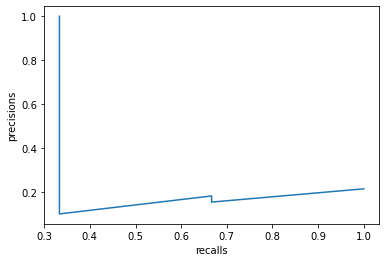

In [9]:
plt.plot(recalls,precisions)
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.show()

In [10]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2.0 * p * r / (p + r)
    return score

In [11]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [12]:
print (f1(y_true, y_pred))
print (metrics.f1_score(y_true, y_pred))

0.5714285714285715
0.5714285714285715


In [13]:
#True Positive Rate (TPR) or recall is also known as sensitivity
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

In [14]:
#False positive rate And 1 - FPR is known as specificity or True Negative Rate or TNR
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [26]:
tpr_list = []; fpr_list = []
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
print (len(y_true), len(y_pred), len(thresholds))
for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    #print (thresh, temp_pred)
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    tpr_list.append(temp_tpr);fpr_list.append(temp_fpr)
    print (thresh,temp_tpr,temp_fpr)

15 15 13
0 1.0 1.0
0.1 1.0 0.9
0.2 1.0 0.7
0.3 0.8 0.6
0.4 0.8 0.3
0.5 0.8 0.3
0.6 0.8 0.2
0.7 0.6 0.1
0.8 0.6 0.1
0.85 0.4 0.1
0.9 0.4 0.0
0.99 0.2 0.0
1.0 0.0 0.0


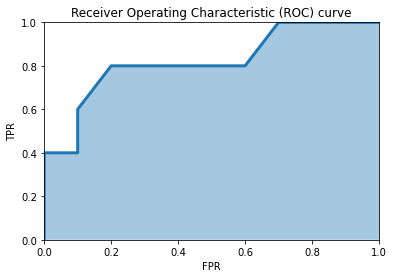

In [30]:
plt.fill_between(fpr_list,tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [31]:
print (metrics.roc_auc_score(y_true, y_pred))

0.8300000000000001
